### Import Libraries

In [1]:
"If it does not work use code below while running this notebook in this dir."
# import sys
# import os
# sys.path.append(os.path.abspath(os.getcwd()))

from mytorch import Tensor
from mytorch import activation as active_func
from mytorch import loss as loss_func
from mytorch import optimizer as optim 
from mytorch import layer as nn

import numpy as np
import matplotlib.pyplot as plt

### Simple Network
here you have to define a simple linear layer to find coefficients of x_i in below problem. <br>
y = ax_1 + bx_2 + cx_3 <br><br>
![simple network.drawio.png](<attachment:simple network.drawio.png>)
<br><br>
weights of this linear layer is your answer. 

### Generate Data

In [2]:
"TODO: set coefficients"
a = 2.5
b = -1.5
c = 3.4

X = Tensor(np.random.randn(100, 3))
coef = Tensor(np.array([[a], [b], [c]]))
y = X @ coef + 5


### Train Network

In [3]:
l = nn.Linear(3, 1, need_bias=True)

# Define an optimizer
optimizer = optim.SGD(layers=[l], learning_rate=0.01)

# Print initial weights and bias of the linear layer
print("Initial weights and bias:")
print("Weights:", l.weight)
print("Bias:", l.bias)

batch_size = 5
epLoss = []

for epoch in range(100):
    
    epoch_loss = 0.0
    
    for start in range(0, 100, batch_size):
        end = start + batch_size

        inputs = X[start:end]
        target = y[start:end]

        # Forward pass: predicted
        output = l(inputs)

        # Calculate MSE loss
        loss = loss_func.MeanSquaredError(output, target)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        # update w and b using optimizer
        optimizer.step()

        # Add loss to epoch_loss
        epoch_loss += loss.data

    epLoss.append(epoch_loss / (100 / batch_size))
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/100], Loss: {epoch_loss:.4f}")

Initial weights and bias:
Weights: Tensor([[ 1.65988752]
 [ 0.83651993]
 [-0.19434013]], requires_grad=True)
Bias: Tensor([[0.]], requires_grad=True)
Epoch [10/100], Loss: 0.6048
Epoch [20/100], Loss: 0.0003
Epoch [30/100], Loss: 0.0000
Epoch [40/100], Loss: 0.0000
Epoch [50/100], Loss: 0.0000
Epoch [60/100], Loss: 0.0000
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000


### Evaluate

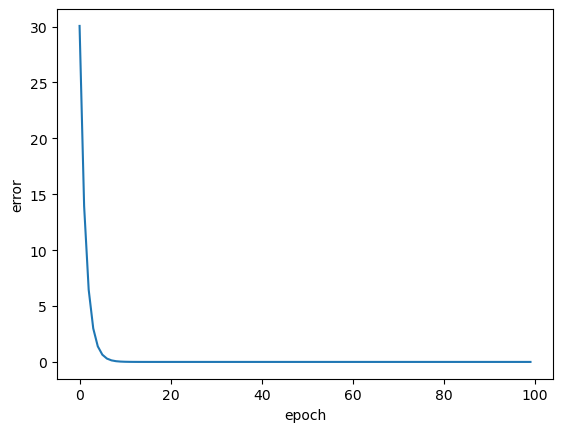


OUT W and bias:
Tensor([[ 2.5]
 [-1.5]
 [ 3.4]], requires_grad=True)
Tensor([[5.]], requires_grad=True)


In [4]:
plt.plot(epLoss, label='Error')
plt.xlabel('epoch')
plt.ylabel('error')
plt.show();

print("\nOUT W and bias:")
print(l.weight)
print(l.bias)